#### Answers submitted by:  Brian Newborn
#### Date:  started 3/19/18 (Monday)
---

# Python Part 3:  Pandas Exercises
---

## Q1:  Read in the libraries you need

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [46]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q2:  Set options in pandas so it displays `max_rows` to 10

In [3]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

## Q3:  What versions of `Python` and `pandas` are you running?  



In [4]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.22.0
Numpy version: 1.14.0


In [5]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## Q4:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [6]:
# read csv data into pandas dataframe
df = pd.read_csv('olive.csv')

## Q5:  How many rows and columns are in this dataframe?


In [19]:
df.shape

#There are 572 rows and 11 columns in this dataframe

(572, 11)

## Q6:  Print the first 4 rows of the data

In [14]:
df.head(4)

#df.head() gives you 5 rows, specifying 4 within head() will give us 4 rows (indices 0-3)

Unnamed: 0  region  area  palmitic  palmitoleic  stearic  oleic  \
0  1.North-Apulia       1     1      1075           75      226   7823   
1  2.North-Apulia       1     1      1088           73      224   7709   
2  3.North-Apulia       1     1       911           54      246   8113   
3  4.North-Apulia       1     1       966           57      240   7952   

   linoleic  linolenic  arachidic  eicosenoic  
0       672         36         60          29  
1       781         31         61          29  
2       549         31         63          29  
3       619         50         78          35

## Q7:  How many different data types are in this dataframe, and what are the data types?

In [23]:
df.dtypes

#There are 11 total data type columns - though there are only 2 unique data types

Unnamed: 0     object
region          int64
area            int64
palmitic        int64
palmitoleic     int64
                ...  
oleic           int64
linoleic        int64
linolenic       int64
arachidic       int64
eicosenoic      int64
Length: 11, dtype: object

In [24]:
df.get_dtype_counts()

#There are 10 int columns, and 1 "object"

int64     10
object     1
dtype: int64

## Q8:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [26]:
df["sub_region_raw"]=df['Unnamed: 0']
df.head()

Unnamed: 0  region  area  palmitic  palmitoleic  stearic  oleic  \
0  1.North-Apulia       1     1      1075           75      226   7823   
1  2.North-Apulia       1     1      1088           73      224   7709   
2  3.North-Apulia       1     1       911           54      246   8113   
3  4.North-Apulia       1     1       966           57      240   7952   
4  5.North-Apulia       1     1      1051           67      259   7771   

   linoleic  linolenic  arachidic  eicosenoic  sub_region_raw  
0       672         36         60          29  1.North-Apulia  
1       781         31         61          29  2.North-Apulia  
2       549         31         63          29  3.North-Apulia  
3       619         50         78          35  4.North-Apulia  
4       672         50         80          46  5.North-Apulia

## Q9:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [43]:
df = df.rename(index=str, columns={"Unnamed: 0":"sub_region_desc"})

## Q10:  Rename the column 'area' to:  'sub_region'

In [36]:
 df = df.rename(index=str, columns={"area":"sub_region"})

## Q11:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [37]:
df.region.value_counts()
#There are 3 values for region - 1,2,3

1    323
3    151
2     98
Name: region, dtype: int64

## Q12:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [41]:
df["sub_region"].value_counts()

#There are 9 unique values of sub_region (1-9)

3    206
5     65
2     56
9     51
8     50
7     50
4     36
6     33
1     25
Name: sub_region, dtype: int64

## Q13:  How many unique values of 'sub_region_desc' are there?
Hint:  we would like the answer to be 9, but here's where we run into some messy data

In [45]:
 df["sub_region_desc"].value_counts()
    #Technically way more because of the proceeding numbers

449.Umbria             1
5.North-Apulia         1
294.South-Apulia       1
381.Coast-Sardinia     1
400.Inland-Sardinia    1
                      ..
289.Sicily             1
29.Calabria            1
508.East-Liguria       1
149.South-Apulia       1
175.South-Apulia       1
Name: sub_region_desc, Length: 572, dtype: int64

## Q14:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
 	region 	sub_region 	palmitic 	palmitoleic 	stearic 	oleic 	linoleic 	linolenic 	arachidic 	eicosenoic 	sub_region_raw
sub_region_desc 											
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

In [54]:
df["sub_region_desc"]=df["sub_region_desc"].str.replace(r'[\(\)\d.]','')
#df.drop(columns="sub_region_desc_clean")

sub_region_desc  region  sub_region  palmitic  palmitoleic  stearic  \
0      North-Apulia       1           1      1075           75      226   
1      North-Apulia       1           1      1088           73      224   
2      North-Apulia       1           1       911           54      246   
3      North-Apulia       1           1       966           57      240   
4      North-Apulia       1           1      1051           67      259   
..              ...     ...         ...       ...          ...      ...   
567    West-Liguria       3           8      1280          110      290   
568    West-Liguria       3           8      1060          100      270   
569    West-Liguria       3           8      1010           90      210   
570    West-Liguria       3           8       990          120      250   
571    West-Liguria       3           8       960           80      240   

     oleic  linoleic  linolenic  arachidic  eicosenoic    sub_region_raw  
0     7823       672         36         60          29    1.North-Apulia  
1     7709       781         31         61          29    2.North-Apulia  
2     8113       549         31         63          29    3.North-Apulia  
3     7952       619         50         78          35    4.North-Apulia  
4     7771       672         50         80          46    5.North-Apulia  
..     ...       ...        ...        ...         ...               ...  
567   7490       790         10         10           2  568.West-Liguria  
568   7740       810         10         10           3  569.West-Liguria  
569   7720       970          0          0           2  570.West-Liguria  
570   7750       870         10         10           2  571.West-Liguria  
571   7950       740         10         20           2  572.West-Liguria  

[572 rows x 12 columns]

In [55]:
df.head()

sub_region_desc  region  sub_region  palmitic  palmitoleic  stearic  oleic  \
0    North-Apulia       1           1      1075           75      226   7823   
1    North-Apulia       1           1      1088           73      224   7709   
2    North-Apulia       1           1       911           54      246   8113   
3    North-Apulia       1           1       966           57      240   7952   
4    North-Apulia       1           1      1051           67      259   7771   

   linoleic  linolenic  arachidic  eicosenoic  sub_region_raw  \
0       672         36         60          29  1.North-Apulia   
1       781         31         61          29  2.North-Apulia   
2       549         31         63          29  3.North-Apulia   
3       619         50         78          35  4.North-Apulia   
4       672         50         80          46  5.North-Apulia   

  sub_region_desc_clean  
0          North-Apulia  
1          North-Apulia  
2          North-Apulia  
3          North-Apulia  
4          North-Apulia

In [56]:
 df.sub_region_desc.value_counts()

South-Apulia       206
Inland-Sardinia     65
Calabria            56
Umbria              51
East-Liguria        50
West-Liguria        50
Sicily              36
Coast-Sardinia      33
North-Apulia        25
Name: sub_region_desc, dtype: int64

## Q15:  Try again:  How many unique values of 'sub_region_desc' are there?
Hint:  you should see 9 of them!

In [57]:
  df.sub_region_desc.value_counts()

South-Apulia       206
Inland-Sardinia     65
Calabria            56
Umbria              51
East-Liguria        50
West-Liguria        50
Sicily              36
Coast-Sardinia      33
North-Apulia        25
Name: sub_region_desc, dtype: int64

## Q16:   Create a horizontal frequency barplot for 'region'

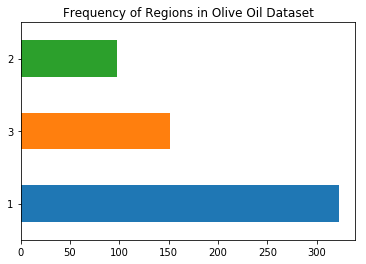

In [93]:
#Tried below, wasnt very pretty - see second attempt for better graph
#df['region'].plot.hist(orientation='horizontal',yticks=[1,2,3],title='Frequency of Regions in Olive Oil Sample', x='Count', y='Region')

regional_counts = df.region.value_counts()
regional_counts.plot.barh(x='Count',y='Regional Number',title='Frequency of Regions in Olive Oil Dataset',align='center')

In [88]:
df['region'].value_counts()

1    323
3    151
2     98
Name: region, dtype: int64

## Q17:   Create a horizontal frequency barplot for 'sub_region'

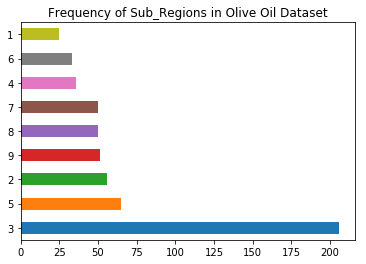

In [98]:
 
sub_regional_counts = df.sub_region.value_counts()
sub_regional_counts.plot.barh(x='Count',y='Sub Region',title='Frequency of Sub_Regions in Olive Oil Dataset',align='center')


## Q18:   Create a horizontal frequency barplot for 'sub_region_desc'

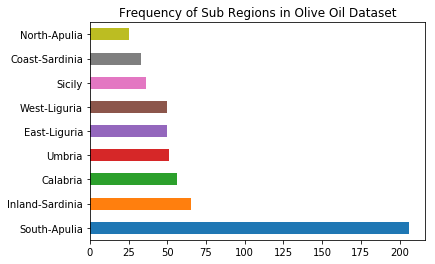

In [100]:
 
sub_regional_desc_counts = df.sub_region_desc.value_counts()
sub_regional_desc_counts.plot.barh(x='Count',y='Sub Region',title='Frequency of Sub Regions in Olive Oil Dataset',align='center')
